In [1]:
import importlib.util
spec = importlib.util.spec_from_file_location("BoundaryLayerToolbox", "/Users/claudiopierard/VC/BoundaryLayerToolbox.py")
blt = importlib.util.module_from_spec(spec)
spec.loader.exec_module(blt)

In [2]:
import matplotlib
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy as spy
import scipy.io as sio
import scipy.optimize as optimization
import scipy.interpolate as interpolate
from netCDF4 import Dataset
import os
import pandas as pd
pd.set_option('html', False)
from IPython import display
from matplotlib import animation
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [16]:
may_24 = h5py.File("/Volumes/BUFFALO_SOLDIER/datos_VC/05/may_24.h5", 'r')
jun_24 = h5py.File("/Volumes/BUFFALO_SOLDIER/datos_VC/06/jun_24.h5", 'r')

In [17]:
may_vc_24 = np.array(may_24.get('vc_24h'))
jun_vc_24 = np.array(jun_24.get('vc_24h'))

In [7]:
delegaciones_path = "/Users/claudiopierard/vc/datos/delegaciones_cdmx/"
estados_path = "/Users/claudiopierard/vc/datos/EstadosMX/"

In [8]:
delegaciones_names = blt.nombres_delegaciones #extrae un lista con las delegaciones guardada en el módulo blt.
estados_names = blt.nombres_estados

In [9]:
delegaciones = {}
for i in delegaciones_names:
    reg = blt.region()
    path = delegaciones_path + i + ".xy"
    blt.read_region(reg, path)
    delegaciones[i] = reg
    

In [10]:
estados = {}
for i in estados_names:
    reg = blt.region()
    path = estados_path + i + ".xy"
    blt.read_region(reg, path)
    estados[i] = reg

In [11]:
xlat = np.loadtxt("/Users/claudiopierard/VC/datos/xlat_d02_interpolado.txt")
xlong = np.loadtxt("/Users/claudiopierard/VC/datos/xlong_d02_interpolado.txt")

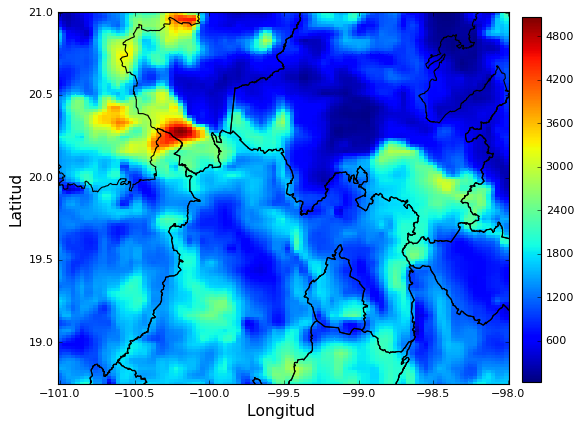

In [15]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.set_xlim(xlong[:,0].min(), xlong[:,0].max())
ax.set_ylim(xlat[0,:].min(), xlat[0,:].max())

im = ax.pcolormesh(xlong, xlat, vc_24[3,10,:,:]) #pblh[18,:,:])
#for name in delegaciones_names:
#    ax.plot(delegaciones[name].lon, delegaciones[name].lat, c='white')
for name in estados_names:
    ax.plot(estados[name].lon, estados[name].lat, c='k')

fig.subplots_adjust(right=0.83)
cbar_ax = fig.add_axes([0.85, 0.13, 0.03, 0.76])
fig.colorbar(im, cax=cbar_ax)

ax.set_xlabel('Longitud ', fontsize=14)
ax.set_ylabel('Latitud', fontsize=14)

In [ ]:
r